In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'kannada49char:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4494369%2F7699620%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240225%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240225T193805Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6378cbcb83029316bf3442c744722b7a4b8e9b494fc02b239f76605a02e4d5de1bcd03de2f160ceb6544ae86f00a5df196175cfc069749badec671e1ededc227a9a2b411fde6935afe02b307f962bc74235b424ac550049de8c937eb23bf7f3350a70833bd6aff762af908f291b3519dc8a0ac2aefdb978d8dd9fdc8f662479eda45d866baf57af974be729383ef26573c8e7f284a1b2880c3d9707c031b6f088a0b4900947f02e61e9125446eeb60ea15d654c233731c82dbb3e8fb95dd8ea6a8486f44b6fc5bdfd27fa28a80a266dd10a5328e89d75329be413d76bdaa928d72dcfaf424c3125fd598dd3c0e00a8ae2e41d5d54a88a82d046ebd7dc4f6c68a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kannada49char/data/val/47/img579-022.png
/kaggle/input/kannada49char/data/val/47/img579-012.png
/kaggle/input/kannada49char/data/val/47/img579-025.png
/kaggle/input/kannada49char/data/val/17/img035-022.png
/kaggle/input/kannada49char/data/val/17/img035-015.png
/kaggle/input/kannada49char/data/val/17/img035-014.png
/kaggle/input/kannada49char/data/val/17/img035-009.png
/kaggle/input/kannada49char/data/val/17/img035-008.png
/kaggle/input/kannada49char/data/val/19/img069-002.png
/kaggle/input/kannada49char/data/val/19/img069-006.png
/kaggle/input/kannada49char/data/val/19/img069-007.png
/kaggle/input/kannada49char/data/val/22/img120-023.png
/kaggle/input/kannada49char/data/val/22/img120-007.png
/kaggle/input/kannada49char/data/val/2/img003-019.png
/kaggle/input/kannada49char/data/val/2/img003-004.png
/kaggle/input/kannada49char/data/val/2/img003-018.png
/kaggle/input/kannada49char/data/val/2/img003-025.png
/kaggle/input/kannada49char/data/val/2/img003-009.png
/kaggle/input/k

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 10.8 MB/s eta 0:00:00a 0:00:01


In [ ]:
from ultralytics import YOLO

In [ ]:
DATADIR = '/kaggle/input/kannada49char/data/'

In [ ]:
model = YOLO("yolov8n-cls.pt")
results = model.train(data=DATADIR,epochs=50,imgsz=128)

100%|██████████| 5.30M/5.30M [00:00<00:00, 66.3MB/s]


Ultralytics YOLOv8.1.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/kaggle/input/kannada49char/data/, epochs=50, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

2024-02-25 18:21:07,176	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-25 18:21:08,009	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-25 18:21:10.145973: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 18:21:10.146104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 18:21:10.269199: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLA

Overriding model.yaml nc=1000 with nc=49

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyt

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 74.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/kannada49char/data/train... 1037 images, 0 corrupt: 100%|██████████| 1037/1037 [00:01<00:00, 892.06it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/kannada49char/data is not writeable, cache not saved.



val: Scanning /kaggle/input/kannada49char/data/val... 213 images, 0 corrupt: 100%|██████████| 213/213 [00:00<00:00, 963.89it/s] 

val: WARNING ⚠️ Cache directory /kaggle/input/kannada49char/data is not writeable, cache not saved.


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.411G      4.002         16        128:  20%|██        | 13/65 [00:01<00:03, 13.26it/s]

       1/50     0.411G      3.972         16        128:  40%|████      | 26/65 [00:02<00:02, 17.84it/s]
100%|██████████| 755k/755k [00:00<00:00, 15.7MB/s]  128:  40%|████      | 26/65 [00:02<00:02, 17.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 17.94it/s]

                   all     0.0892      0.272



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 44.88it/s]

                   all      0.385      0.667



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 45.23it/s]

                   all      0.493      0.826



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 46.30it/s]

                   all      0.624      0.925



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 44.35it/s]

                   all      0.746      0.958



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 42.34it/s]

                   all      0.779      0.977



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 45.06it/s]

                   all      0.812      0.981



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 41.65it/s]

                   all      0.845      0.981



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 49.23it/s]

                   all      0.817      0.991



      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.396G     0.8188         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 43.44it/s]

                   all      0.873      0.995



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.396G      0.759         13        128: 100%|██████████| 65/65 [00:02<00:00, 25.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 50.00it/s]

                   all      0.901      0.991



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.396G     0.7413         13        128: 100%|██████████| 65/65 [00:02<00:00, 27.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 45.65it/s]


                   all      0.892      0.995

      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.396G     0.7458         13        128: 100%|██████████| 65/65 [00:02<00:00, 25.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 47.17it/s]

                   all      0.883      0.991



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.396G     0.7007         13        128: 100%|██████████| 65/65 [00:02<00:00, 24.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 44.58it/s]

                   all      0.897      0.977



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.396G      0.631         13        128: 100%|██████████| 65/65 [00:02<00:00, 23.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 46.16it/s]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.396G     0.6448         13        128: 100%|██████████| 65/65 [00:02<00:00, 25.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 44.13it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.396G     0.6026         13        128: 100%|██████████| 65/65 [00:02<00:00, 22.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 38.25it/s]

                   all      0.901          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.396G     0.5881         13        128: 100%|██████████| 65/65 [00:02<00:00, 22.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 40.79it/s]

                   all      0.911          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.396G     0.5842         13        128: 100%|██████████| 65/65 [00:02<00:00, 25.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 42.46it/s]

                   all      0.911          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.396G     0.5251         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 47.11it/s]


                   all       0.93      0.995

      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.396G     0.5062         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 48.57it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.396G     0.5404         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 48.41it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.396G     0.5182         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 51.40it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.396G     0.5228         13        128: 100%|██████████| 65/65 [00:02<00:00, 27.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 46.26it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.396G     0.5196         13        128: 100%|██████████| 65/65 [00:02<00:00, 25.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 46.10it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.396G     0.4948         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 42.29it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.396G     0.5165         13        128: 100%|██████████| 65/65 [00:02<00:00, 27.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 47.23it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.396G     0.4789         13        128: 100%|██████████| 65/65 [00:02<00:00, 23.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 51.64it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.396G     0.4614         13        128: 100%|██████████| 65/65 [00:02<00:00, 27.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 48.41it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.396G     0.4308         13        128: 100%|██████████| 65/65 [00:02<00:00, 27.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 43.21it/s]

                   all      0.944      0.995



      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.396G     0.4506         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 47.75it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.396G     0.4257         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 47.70it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.396G     0.4623         13        128: 100%|██████████| 65/65 [00:02<00:00, 25.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 39.22it/s]


                   all      0.958          1

      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.396G     0.4113         13        128: 100%|██████████| 65/65 [00:02<00:00, 27.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 41.18it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.396G     0.4229         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 45.52it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.396G     0.4123         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 45.22it/s]

                   all      0.953      0.995



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.396G     0.4645         13        128: 100%|██████████| 65/65 [00:02<00:00, 27.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 50.36it/s]

                   all      0.944      0.995



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.396G     0.4252         13        128: 100%|██████████| 65/65 [00:02<00:00, 24.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 40.27it/s]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.396G      0.424         13        128: 100%|██████████| 65/65 [00:02<00:00, 25.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 47.97it/s]

                   all      0.953      0.995



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.396G     0.3936         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 50.54it/s]


                   all      0.953      0.995

      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.396G     0.4195         13        128: 100%|██████████| 65/65 [00:02<00:00, 22.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 45.48it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.396G     0.4625         13        128: 100%|██████████| 65/65 [00:02<00:00, 25.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 46.77it/s]

                   all      0.948          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50     0.396G      0.359         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 50.08it/s]

                   all      0.948      0.995



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.396G     0.4171         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 46.87it/s]

                   all      0.953      0.995



      Epoch    GPU_mem       loss  Instances       Size


      45/50     0.396G     0.3763         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 41.49it/s]

                   all      0.953      0.995



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.396G     0.3736         13        128: 100%|██████████| 65/65 [00:02<00:00, 27.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 47.88it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.396G      0.356         13        128: 100%|██████████| 65/65 [00:02<00:00, 25.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 48.47it/s]

                   all      0.958          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.396G     0.3541         13        128: 100%|██████████| 65/65 [00:02<00:00, 23.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 38.11it/s]


                   all      0.962          1

      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.396G      0.399         13        128: 100%|██████████| 65/65 [00:02<00:00, 25.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 48.23it/s]


                   all      0.958      0.995

      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.396G     0.3526         13        128: 100%|██████████| 65/65 [00:02<00:00, 26.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 41.58it/s]

                   all      0.958          1



50 epochs completed in 0.047 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.1MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.1MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1497649 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/input/kannada49char/data/train... found 1037 images in 49 classes ✅ 
val: /kaggle/input/kannada49char/data/val... found 213 images in 49 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:00<00:00, 11.47it/s]


                   all      0.958          1
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


lr/pg0,▃▆████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/accuracy_top1,▁▃▄▅▇▇▇▇█▇▇▇████████████████████████████
metrics/accuracy_top5,▁▅▆▇████████████████████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/loss,█▇▆▄▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/loss,█▇▆▅▃▃▃▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg0,4e-05


In [ ]:
learner = YOLO('/kaggle/working/runs/classify/train/weights/best.pt')
res = learner.predict('/kaggle/input/kannada49char/data/train/45/img545-001.png')
res[0].probs


image 1/1 /kaggle/input/kannada49char/data/train/45/img545-001.png: 128x128 45 1.00, 35 0.00, 36 0.00, 8 0.00, 9 0.00, 3.0ms
Speed: 6.9ms preprocess, 3.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


ultralytics.engine.results.Probs object with attributes:

data: tensor([6.7484e-09, 1.1976e-09, 4.8208e-08, 1.1332e-07, 3.4033e-07, 1.6604e-07, 6.5000e-10, 1.1073e-08, 6.8492e-08, 2.1374e-09, 8.0568e-09, 2.1746e-08, 5.6424e-10, 7.5045e-08, 3.7995e-08, 6.3317e-06, 3.7457e-07, 1.1780e-10, 4.5837e-11, 1.8201e-08, 6.2420e-06, 2.2504e-06, 1.2706e-08, 2.8891e-10, 7.1363e-10, 1.0050e-05,
        4.8780e-07, 1.6511e-05, 2.2434e-07, 4.2882e-04, 2.4064e-04, 1.1304e-06, 2.2406e-09, 2.7016e-08, 8.4498e-10, 1.9893e-05, 4.9970e-10, 2.3507e-07, 1.9887e-10, 2.6391e-08, 9.9906e-01, 2.4246e-08, 5.8927e-08, 1.1549e-07, 3.6969e-07, 1.6459e-10, 4.8875e-09, 1.0601e-04, 9.4351e-05], device='cuda:0')
orig_shape: None
shape: torch.Size([49])
top1: 40
top1conf: tensor(0.9991, device='cuda:0')
top5: [40, 29, 30, 47, 48]
top5conf: tensor([9.9906e-01, 4.2882e-04, 2.4064e-04, 1.0601e-04, 9.4351e-05], device='cuda:0')

In [ ]:
import shutil
shutil.copy('/kaggle/working/runs/classify/train/weights/best.pt','/kaggle/working/model.pt')

'/kaggle/working/model.pt'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import cv2

In [ ]:
y_train = []
X_train = []
for cat in os.listdir('/kaggle/input/kannada49char/data/train'):
    for img in os.listdir(os.path.join('/kaggle/input/kannada49char/data/train',cat)):
        if int(cat) > 7:
            y_train.append(int(cat)-1)
        else:
            y_train.append(int(cat))
        img2 = cv2.imread(os.path.join('/kaggle/input/kannada49char/data/train',cat)+"/"+img)
        imgz = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        X_train.append(imgz)

In [ ]:
for cat in os.listdir('/kaggle/input/kannada49char/data/val'):
    for img in os.listdir(os.path.join('/kaggle/input/kannada49char/data/val',cat)):
        if int(cat) > 7:
            y_train.append(int(cat)-1)
        else:
            y_train.append(int(cat))
        img2 = cv2.imread(os.path.join('/kaggle/input/kannada49char/data/val',cat)+"/"+img)
        imgz = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        X_train.append(imgz)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
print(X_train.shape,y_train.shape)

(1250, 128, 128) (1250,)


In [ ]:
lossFN = 'sparse_categorical_crossentropy'
optimizerFN = tf.keras.optimizers.Adam()

In [ ]:
data_augmentation = models.Sequential(layers.experimental.preprocessing.RandomRotation((-0.1, 0.1),input_shape=(128, 128, 1)))

In [ ]:
X_train = X_train/255

In [ ]:
model =  models.Sequential([

    data_augmentation,

    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',padding = 'same'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),


    layers.Flatten(),


    layers.Dense(128,activation = 'relu'),

    layers.Dropout(0.1),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(49, activation='softmax')
])

model.compile(optimizer=optimizerFN,
              loss= lossFN,
              metrics=['accuracy'])

In [ ]:
os.mkdir('/kaggle/working/chekcpoints')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = '/kaggle/working/chekcpoints-{epoch:02d}-{val_accuracy:.02f}.h5'
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='min')

In [ ]:
hist = model.fit(X_train,y_train,batch_size=16,validation_split = 0.10,callbacks=[checkpoint],epochs=100)

Epoch 1/100


2024-02-25 19:25:57.454716: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1708889160.798988     102 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


71/71 [==============================] - ETA: 0s - loss: 6.1888 - accuracy: 0.0160
Epoch 1: val_loss improved from inf to 3.89469, saving model to /kaggle/working/chekcpoints-01-0.02.h5
71/71 [==============================] - 8s 22ms/step - loss: 6.1888 - accuracy: 0.0160 - val_loss: 3.8947 - val_accuracy: 0.0160
Epoch 2/100
15/71 [=====>........................] - ETA: 0s - loss: 3.8860 - accuracy: 0.0500  

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


71/71 [==============================] - ETA: 0s - loss: 3.8955 - accuracy: 0.0222
Epoch 2: val_loss improved from 3.89469 to 3.89373, saving model to /kaggle/working/chekcpoints-02-0.00.h5
71/71 [==============================] - 1s 9ms/step - loss: 3.8955 - accuracy: 0.0222 - val_loss: 3.8937 - val_accuracy: 0.0000e+00
Epoch 3/100
71/71 [==============================] - ETA: 0s - loss: 3.8949 - accuracy: 0.0222
Epoch 3: val_loss did not improve from 3.89373
71/71 [==============================] - 1s 8ms/step - loss: 3.8949 - accuracy: 0.0222 - val_loss: 3.8966 - val_accuracy: 0.0000e+00
Epoch 4/100
71/71 [==============================] - ETA: 0s - loss: 3.8948 - accuracy: 0.0222
Epoch 4: val_loss did not improve from 3.89373
71/71 [==============================] - 1s 8ms/step - loss: 3.8948 - accuracy: 0.0222 - val_loss: 3.8997 - val_accuracy: 0.0080
Epoch 5/100
71/71 [==============================] - ETA: 0s - loss: 3.8945 - accuracy: 0.0222
Epoch 5: val_loss did not improve fr

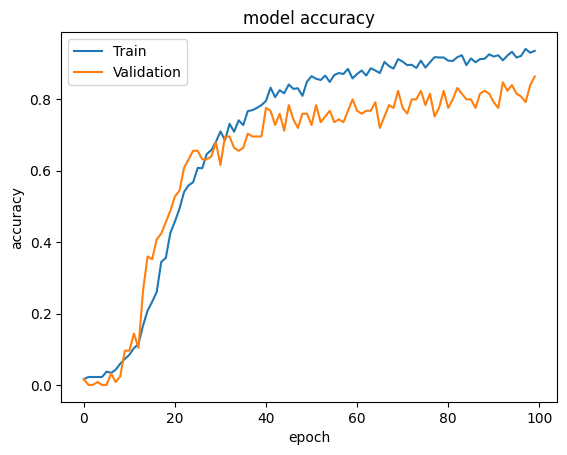

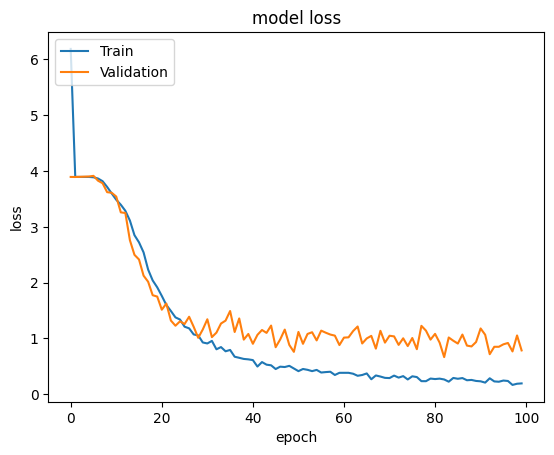

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()